In [1]:
# pip install yfinance

In [2]:
#Import Dependencies
import pip as np
import pandas as pd
import yfinance as yf
import plotly .graph_objs as go
from datetime import datetime as dt

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


C:\Users\jemnj\.conda\envs\mlenv\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Data Source:  yfinance API to extract the latest stock price data

### Dogecoin USD (DOGE-USD)

In [3]:
ticker = yf.Ticker('DOGE-USD')
DOGE_USD_df= ticker.history(period="5y")
DOGE_USD_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550,0,0
2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520,0,0
2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080,0,0
2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960,0,0
2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270,0,0


<AxesSubplot:title={'center':'Dogecoin stock price'}, xlabel='Date'>

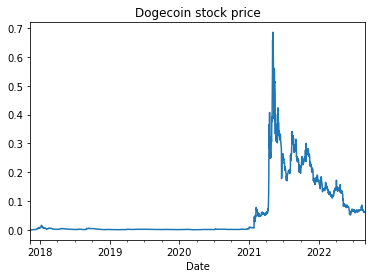

In [4]:
# plotting a graph
DOGE_USD_df['Close'].plot(title="Dogecoin stock price")

In [5]:
# saving data in csv file
DOGE_USD_df.to_csv("Resources/DOGE-USD.csv")

In [6]:
# Drop Unnecessary columns
X = DOGE_USD_df.copy()
X = X.drop(columns=["Close","Dividends","Stock Splits","Volume"], axis=1)
X = pd.get_dummies(X)
X.head()

,Open,High,Low
Date,,,
2017-11-09,0.001207,0.001415,0.001181
2017-11-10,0.001421,0.001431,0.001125
2017-11-11,0.001146,0.001257,0.001141
2017-11-12,0.001189,0.001210,0.001002
2017-11-13,0.001046,0.001212,0.001019


In [7]:
# Define the target set.
y = DOGE_USD_df["Close"].ravel()
y[:5]

array([0.001415, 0.001163, 0.001201, 0.001038, 0.001211])

In [8]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaleddoge = X_scaler.transform(X_train)
X_test_scaleddoge = X_scaler.transform(X_test)

In [10]:
X_test_scaleddoge

array([[-0.46320389, -0.42994915, -0.46330113],
       [-0.56463805, -0.55644959, -0.57271401],
       [-0.55819418, -0.54993141, -0.56550755],
       ...,
       [ 0.02141829, -0.00250434,  0.04579934],
       [ 1.72825352,  1.60298383,  1.76921404],
       [-0.55908231, -0.55145109, -0.56751347]])

In [11]:
X.describe()

,Open,High,Low
count,1759.000000,1759.000000,1759.000000
mean,0.059573,0.063096,0.056123
std,0.101354,0.109183,0.093722
min,0.001046,0.001210,0.001002
25%,0.002549,0.002616,0.002499
50%,0.003474,0.003600,0.003354
75%,0.070648,0.075085,0.068494
max,0.687801,0.737567,0.608168


In [12]:
# Fitting the model
regrdoge = RandomForestRegressor(max_depth=2, random_state=78)
regrdoge.fit(X_train_scaleddoge, y_train)

RandomForestRegressor(max_depth=2, random_state=78)

In [13]:
predictiondoge=regrdoge.predict(X_test_scaleddoge)

In [14]:
regrdoge.score(X_test_scaleddoge,y_test)

0.9612910417729643

In [15]:
value_tocheckdoge=[0.001207,0.001415,0.001181]
scaledcheckdoge= X_scaler.transform([value_tocheckdoge])

C:\Users\jemnj\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
print(regrdoge.predict(scaledcheckdoge))

[0.00341621]


In [17]:
# Calculate feature importance in the Random Forest model.
importancesdoge = regrdoge.feature_importances_
importancesdoge

array([0.12407649, 0.46872441, 0.40719911])

In [18]:
X_test.columns

Index(['Open', 'High', 'Low'], dtype='object')

### Bitcoin USD (BTC-USD)

In [19]:
ticker = yf.Ticker('BTC-USD')
BTC_USD_df= ticker.history(period="5y")
BTC_USD_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-09-02,4901.419922,4975.040039,4469.240234,4578.770020,2722139904,0,0
2017-09-03,4585.270020,4714.080078,4417.589844,4582.959961,1933190016,0,0
2017-09-04,4591.629883,4591.629883,4108.399902,4236.310059,2987330048,0,0
2017-09-05,4228.290039,4427.839844,3998.110107,4376.529785,2697969920,0,0
2017-09-06,4376.589844,4617.250000,4376.589844,4597.120117,2172100096,0,0


<AxesSubplot:title={'center':'Bitcoin stock price'}, xlabel='Date'>

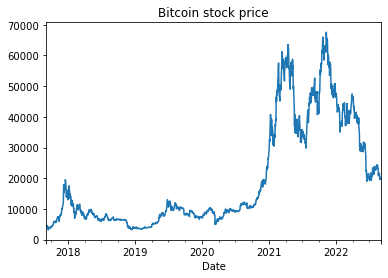

In [20]:
# plotting data
BTC_USD_df['Close'].plot(title="Bitcoin stock price")

In [21]:
# Drop Unnecessary columns
X2 = BTC_USD_df.copy()
X2 = X2.drop(columns=["Close","Dividends","Stock Splits","Volume"], axis=1)
X2 = pd.get_dummies(X2)
X2.head()

,Open,High,Low
Date,,,
2017-09-02,4901.419922,4975.040039,4469.240234
2017-09-03,4585.270020,4714.080078,4417.589844
2017-09-04,4591.629883,4591.629883,4108.399902
2017-09-05,4228.290039,4427.839844,3998.110107
2017-09-06,4376.589844,4617.250000,4376.589844


In [22]:
# Define the target set.
y2 = BTC_USD_df["Close"].ravel()
y2[:5]

array([4578.77001953, 4582.95996094, 4236.31005859, 4376.52978516,
       4597.12011719])

In [23]:
# Splitting into Train and Test sets.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=78)

In [24]:
# Creating a StandardScaler instance.
scalerbtc = StandardScaler()
# Fitting the Standard Scaler with the training data.
X2_scalerbtc = scalerbtc.fit(X2_train)

# Scaling the data.
X2_train_scaledbtc = X2_scalerbtc.transform(X2_train)
X2_test_scaledbtc = X2_scalerbtc.transform(X2_test)

In [25]:
X2_test_scaledbtc

array([[ 0.21044071,  0.23450559,  0.24991731],
       [-0.62241599, -0.62617285, -0.60832377],
       [-0.73917226, -0.71600663, -0.72942037],
       ...,
       [ 1.33404468,  1.38979305,  1.40204339],
       [-0.71457869, -0.72476717, -0.71888902],
       [-0.69731676, -0.702604  , -0.69072964]])

In [26]:
X2.describe()

,Open,High,Low
count,1827.000000,1827.000000,1827.000000
mean,19651.302502,20159.534975,19080.638157
std,17289.883426,17734.390825,16770.486547
min,3166.300049,3275.377930,2946.620117
25%,7248.951904,7393.735596,7083.859375
50%,10198.599609,10394.353516,9903.969727
75%,33767.375000,34778.076172,32265.797852
max,67549.734375,68789.625000,66382.062500


In [27]:
# Fitting the model
regrbtc = RandomForestRegressor(max_depth=2, random_state=78)
regrbtc.fit(X2_train_scaledbtc, y2_train)

RandomForestRegressor(max_depth=2, random_state=78)

In [28]:
predictionbtc=regrbtc.predict(X2_test_scaledbtc)

In [29]:
regrbtc.score(X2_test_scaledbtc,y2_test)

0.9628785596700892

In [30]:
value_tocheck=[4901.419922,4975.040039,4469.240234]
scaledcheck= X2_scalerbtc.transform([value_tocheck])

C:\Users\jemnj\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [31]:
print(regrbtc.predict(scaledcheck))

[7778.24120589]


In [32]:
# Calculate feature importance in the Random Forest model.
importancesbtc = regrbtc.feature_importances_
importancesbtc

array([0.35021587, 0.36278463, 0.28699951])

In [33]:
X2_test.columns

Index(['Open', 'High', 'Low'], dtype='object')

### XRP USD (XRP-USD)


In [34]:
ticker = yf.Ticker('XRP-USD')
XRP_USD_df = ticker.history(period="5y")
XRP_USD_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09,0.217911,0.221791,0.214866,0.217488,147916992,0,0
2017-11-10,0.218256,0.219068,0.205260,0.206483,141032992,0,0
2017-11-11,0.205948,0.214456,0.205459,0.210430,134503008,0,0
2017-11-12,0.210214,0.210214,0.195389,0.197339,251175008,0,0
2017-11-13,0.197472,0.204081,0.197456,0.203442,132567000,0,0


<AxesSubplot:title={'center':'XRP stock price'}, xlabel='Date'>

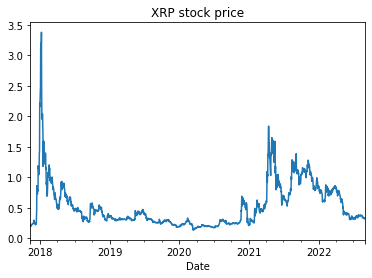

In [35]:
# plotting data
XRP_USD_df['Close'].plot(title="XRP stock price")

In [36]:
# Drop Unnecessary columns
X3 = XRP_USD_df.copy()
X3 = X3.drop(columns=["Close","Dividends","Stock Splits","Volume"], axis=1)
X3 = pd.get_dummies(X3)
X3.head()

,Open,High,Low
Date,,,
2017-11-09,0.217911,0.221791,0.214866
2017-11-10,0.218256,0.219068,0.205260
2017-11-11,0.205948,0.214456,0.205459
2017-11-12,0.210214,0.210214,0.195389
2017-11-13,0.197472,0.204081,0.197456


In [37]:
# Define the target set.
y3 = XRP_USD_df["Close"].ravel()
y3[:5]

array([0.21748801, 0.20648301, 0.21043   , 0.197339  , 0.20344201])

In [38]:
# Splitting into Train and Test sets.
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=78)

In [39]:
# Creating a StandardScaler instance.
scalerxrp = StandardScaler()
# Fitting the Standard Scaler with the training data.
X3_scalerxrp = scalerxrp.fit(X3_train)

# Scaling the data.
X3_train_scaledxrp = X3_scalerxrp.transform(X3_train)
X3_test_scaledxrp = X3_scalerxrp.transform(X3_test)

In [40]:
X3_test_scaledxrp

array([[ 6.72848725,  6.64238536,  7.31740787],
       [-0.62787918, -0.63372339, -0.63802698],
       [-0.67947923, -0.66675408, -0.66825662],
       ...,
       [-0.53934611, -0.54221853, -0.53070046],
       [ 0.37113313,  0.29941742,  0.43620596],
       [-0.90703086, -0.88727849, -0.93832929]])

In [41]:
X3.describe()

,Open,High,Low
count,1759.000000,1759.000000,1759.000000
mean,0.532054,0.555905,0.506656
std,0.375233,0.406316,0.344708
min,0.140524,0.146911,0.115093
25%,0.277366,0.284119,0.269360
50%,0.386587,0.403607,0.373879
75%,0.712923,0.744617,0.674432
max,3.363570,3.841940,3.117340


In [42]:
# Fitting the model
regrxrp = RandomForestRegressor(max_depth=2, random_state=78)
regrxrp.fit(X3_train_scaledxrp, y3_train)

RandomForestRegressor(max_depth=2, random_state=78)

In [43]:
predictionxrp=regrxrp.predict(X3_test_scaledxrp)

In [44]:
regrxrp.score(X3_test_scaledxrp,y3_test)

0.8933415654507648

In [45]:
value_tocheckxrp=[0.217911,0.221791,0.214866]
scaledcheckxrp= X3_scalerxrp.transform([value_tocheck])

C:\Users\jemnj\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [46]:
# Making predictions using the testing data.
print(regrxrp.predict(scaledcheck))

[0.27806003]


In [47]:
# Calculate feature importance in the Random Forest model.
importancesxrp = regrxrp.feature_importances_
importancesxrp

array([0.17301641, 0.3738015 , 0.45318208])

In [48]:
X3_test.columns

Index(['Open', 'High', 'Low'], dtype='object')

### Tether USD (USDT-USD)

In [49]:
ticker = yf.Ticker('USDT-USD')
USDT_USD_df= ticker.history(period="5y")
USDT_USD_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09,1.01087,1.01327,0.996515,1.00818,358188000,0,0
2017-11-10,1.00650,1.02423,0.995486,1.00601,756446016,0,0
2017-11-11,1.00598,1.02621,0.995799,1.00899,746227968,0,0
2017-11-12,1.00602,1.10591,0.967601,1.01247,1466060032,0,0
2017-11-13,1.00448,1.02929,0.975103,1.00935,767884032,0,0


<AxesSubplot:title={'center':'Tether stock price'}, xlabel='Date'>

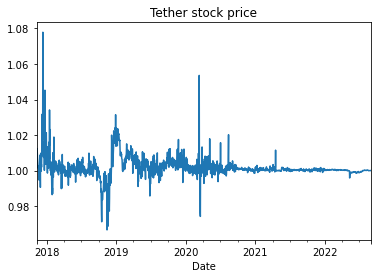

In [50]:
# plotting data
USDT_USD_df['Close'].plot(title="Tether stock price")

In [51]:
# Drop Unnecessary columns
X4 = USDT_USD_df.copy()
X4 = X4.drop(columns=["Close","Dividends","Stock Splits","Volume"], axis=1)
X4 = pd.get_dummies(X4)
X4.head(10)

,Open,High,Low
Date,,,
2017-11-09,1.010870,1.01327,0.996515
2017-11-10,1.006500,1.02423,0.995486
2017-11-11,1.005980,1.02621,0.995799
2017-11-12,1.006020,1.10591,0.967601
2017-11-13,1.004480,1.02929,0.975103
2017-11-14,1.005240,1.01343,0.996898
2017-11-15,1.004580,1.01163,1.000250
2017-11-16,1.005820,1.01089,0.993232
2017-11-17,0.995758,1.01181,0.995758


In [52]:
# Define the target set.
y4 = USDT_USD_df["Close"].ravel()
y4[:5]

array([1.00818002, 1.00601006, 1.00899005, 1.01247001, 1.00934994])

In [53]:
# Splitting into Train and Test sets.
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, random_state=78)

In [54]:
# Creating a StandardScaler instance.
scalerusdt = StandardScaler()
# Fitting the Standard Scaler with the training data.
X4_scalerusdt = scalerusdt.fit(X_train)

# Scaling the data.
X4_train_scaledusdt = X4_scalerusdt.transform(X4_train)
X4_test_scaledusdt = X4_scalerusdt.transform(X4_test)

In [55]:
X4_test_scaledusdt

array([[ 9.28700798,  8.69095428,  9.98681148],
       [ 9.36591291,  8.69491909, 10.08413572],
       [ 9.30989188,  8.61893399,  9.94134433],
       ...,
       [ 9.28438232,  8.58134414, 10.0199359 ],
       [ 9.28446232,  8.58752436, 10.0178559 ],
       [ 9.33627901,  8.69964237,  9.99832741]])

In [56]:
# Fitting the model
regrusdt = RandomForestRegressor(max_depth=2, random_state=78)
regrusdt.fit(X4_train_scaledusdt, y4_train)

RandomForestRegressor(max_depth=2, random_state=78)

In [57]:
value_tocheckusdt=[1.010870,1.01327,0.996515]
scaledcheckusdt= X4_scalerusdt.transform([value_tocheck])

C:\Users\jemnj\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [58]:
# Making predictions using the testing data.
print(regrusdt.predict(scaledcheck))

[0.0485381]


In [59]:
regrusdt.score(X4_test_scaledusdt,y4_test)

0.5160041826327889

In [60]:
# Calculate feature importance in the Random Forest model.
importancesusdt = regrusdt.feature_importances_
importancesusdt

array([0.0954618 , 0.89673725, 0.00780095])

In [61]:
X4_test.columns

Index(['Open', 'High', 'Low'], dtype='object')

### Ethereum USD (ETH-USD)

In [62]:
ticker = yf.Ticker('ETH-USD')
ETH_USD_df= ticker.history(period="5y")
ETH_USD_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0,0
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0,0
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0,0
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0,0
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0,0


<AxesSubplot:title={'center':'Ethereum stock price'}, xlabel='Date'>

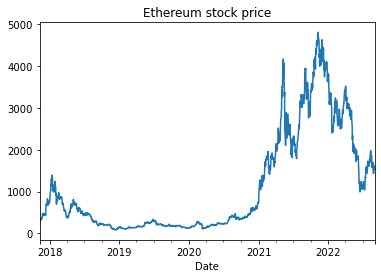

In [63]:
# plotting a graph
ETH_USD_df['Close'].plot(title="Ethereum stock price")


In [64]:
# Drop Unnecessary columns
X5 = ETH_USD_df.copy()
X5 = X5.drop(columns=["Close","Dividends","Stock Splits","Volume"], axis=1)
X5 = pd.get_dummies(X5)
X5.head()

,Open,High,Low
Date,,,
2017-11-09,308.644989,329.451996,307.056000
2017-11-10,320.670990,324.717987,294.541992
2017-11-11,298.585999,319.453003,298.191986
2017-11-12,314.690002,319.153015,298.513000
2017-11-13,307.024994,328.415009,307.024994


In [65]:
# Define the target set.
y5 = ETH_USD_df["Close"].ravel()
y[:5]

array([0.001415, 0.001163, 0.001201, 0.001038, 0.001211])

In [66]:
# Splitting into Train and Test sets.
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=78)

In [67]:
# Creating a StandardScaler instance.
scalereth = StandardScaler()
# Fitting the Standard Scaler with the training data.
X5_scalereth = scalereth.fit(X5_train)

# Scaling the data.
X5_train_scaledeth = X5_scalereth.transform(X5_train)
X5_test_scaledeth = X5_scalereth.transform(X5_test)

In [68]:
X5_test_scaledeth

array([[-0.08734782, -0.06148942, -0.05595004],
       [-0.81768821, -0.82190867, -0.81520285],
       [-0.68981218, -0.68906008, -0.68054141],
       ...,
       [ 0.3718543 ,  0.3630599 ,  0.39209344],
       [ 1.00438663,  1.00955831,  1.05519804],
       [-0.71301067, -0.720573  , -0.715254  ]])

In [69]:
X5.describe()

,Open,High,Low
count,1759.000000,1759.000000,1759.000000
mean,1114.958063,1151.787971,1073.054686
std,1226.406169,1264.023931,1182.814646
min,84.279694,85.342743,82.829887
25%,205.173996,210.972000,201.109276
50%,450.678986,467.677826,433.920990
75%,1833.925293,1875.542969,1770.421631
max,4810.071289,4891.704590,4718.039062


In [70]:
# Fitting the model
regreth = RandomForestRegressor(max_depth=2, random_state=78)
regreth.fit(X5_train_scaledeth, y5_train)

RandomForestRegressor(max_depth=2, random_state=78)

In [71]:
predictioneth=regreth.predict(X5_test_scaledeth)

In [72]:
regreth.score(X5_test_scaledeth,y5_test)

0.9538706849133222

In [73]:
value_tochecketh=[308.644989,329.451996, 307.056000]
scaledchecketh= X5_scalereth.transform([value_tocheck])

C:\Users\jemnj\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [74]:
# Making predictions using the testing data.
print(regreth.predict(scaledcheck))

[273.04842365]


In [75]:
# Calculate feature importance in the Random Forest model.
importanceseth = regreth.feature_importances_
importanceseth

array([0.01721712, 0.32005484, 0.66272804])

In [76]:
X5_test.columns

Index(['Open', 'High', 'Low'], dtype='object')

# storing data into mongodb

In [77]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [78]:
import pymongo
import json

In [79]:
# database connection
client = pymongo.MongoClient("mongodb://localhost:27017")

In [80]:
# Converting DataFrame into dictionary
DOGE_df= DOGE_USD_df.to_dict(orient="records")
BTC_df= BTC_USD_df.to_dict(orient="records")
XRP_df= XRP_USD_df.to_dict(orient="records")
USDT_df= USDT_USD_df.to_dict(orient="records")
ETH_df= ETH_USD_df.to_dict(orient="records")

In [81]:
# Creating database name
db = client["MachineLearning"]
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'MachineLearning')


In [82]:
#  creating table name and inerting data
db.DOGE.insert_many(DOGE_df)
db.BTC.insert_many(BTC_df)
db.XRP.insert_many(XRP_df)
db.Tether_USDT.insert_many(USDT_df)
db.ETH.insert_many(ETH_df)

# Combining all 5 crypto currencies DataFames in single DataFrame

# EDA

In [83]:
DOGE_USD_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550,0,0
2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520,0,0
2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080,0,0
2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960,0,0
2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270,0,0
...,...,...,...,...,...,...,...
2022-08-29,0.061753,0.063982,0.061246,0.063887,315005254,0,0
2022-08-30,0.063899,0.064408,0.060550,0.061525,328934727,0,0
2022-08-31,0.061534,0.063333,0.061058,0.061330,309748693,0,0


In [84]:
DOGE = DOGE_USD_df.drop(columns=["Dividends","Stock Splits","Volume"], axis=1)
DOGE

,Open,High,Low,Close
Date,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415
2017-11-10,0.001421,0.001431,0.001125,0.001163
2017-11-11,0.001146,0.001257,0.001141,0.001201
2017-11-12,0.001189,0.001210,0.001002,0.001038
2017-11-13,0.001046,0.001212,0.001019,0.001211
...,...,...,...,...
2022-08-29,0.061753,0.063982,0.061246,0.063887
2022-08-30,0.063899,0.064408,0.060550,0.061525
2022-08-31,0.061534,0.063333,0.061058,0.061330


In [85]:
dogetest=DOGE.copy()
dogetest["Coin Name"]="DOGE"
dogetest

,Open,High,Low,Close,Coin Name
Date,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,DOGE
2017-11-10,0.001421,0.001431,0.001125,0.001163,DOGE
2017-11-11,0.001146,0.001257,0.001141,0.001201,DOGE
2017-11-12,0.001189,0.001210,0.001002,0.001038,DOGE
2017-11-13,0.001046,0.001212,0.001019,0.001211,DOGE
...,...,...,...,...,...
2022-08-29,0.061753,0.063982,0.061246,0.063887,DOGE
2022-08-30,0.063899,0.064408,0.060550,0.061525,DOGE
2022-08-31,0.061534,0.063333,0.061058,0.061330,DOGE


In [86]:
BTC_USD_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-09-02,4901.419922,4975.040039,4469.240234,4578.770020,2722139904,0,0
2017-09-03,4585.270020,4714.080078,4417.589844,4582.959961,1933190016,0,0
2017-09-04,4591.629883,4591.629883,4108.399902,4236.310059,2987330048,0,0
2017-09-05,4228.290039,4427.839844,3998.110107,4376.529785,2697969920,0,0
2017-09-06,4376.589844,4617.250000,4376.589844,4597.120117,2172100096,0,0


In [87]:
BTC= BTC_USD_df.drop(columns=["Dividends","Stock Splits","Volume"], axis=1)
BTC

,Open,High,Low,Close
Date,,,,
2017-09-02,4901.419922,4975.040039,4469.240234,4578.770020
2017-09-03,4585.270020,4714.080078,4417.589844,4582.959961
2017-09-04,4591.629883,4591.629883,4108.399902,4236.310059
2017-09-05,4228.290039,4427.839844,3998.110107,4376.529785
2017-09-06,4376.589844,4617.250000,4376.589844,4597.120117
...,...,...,...,...
2022-08-29,19615.154297,20357.462891,19600.785156,20297.994141
2022-08-30,20298.611328,20542.644531,19617.640625,19796.808594
2022-08-31,19799.582031,20420.990234,19799.582031,20049.763672


In [88]:
BTCtest=BTC.copy()
BTCtest["Coin Name"]="BTC"
BTCtest

,Open,High,Low,Close,Coin Name
Date,,,,,
2017-09-02,4901.419922,4975.040039,4469.240234,4578.770020,BTC
2017-09-03,4585.270020,4714.080078,4417.589844,4582.959961,BTC
2017-09-04,4591.629883,4591.629883,4108.399902,4236.310059,BTC
2017-09-05,4228.290039,4427.839844,3998.110107,4376.529785,BTC
2017-09-06,4376.589844,4617.250000,4376.589844,4597.120117,BTC
...,...,...,...,...,...
2022-08-29,19615.154297,20357.462891,19600.785156,20297.994141,BTC
2022-08-30,20298.611328,20542.644531,19617.640625,19796.808594,BTC
2022-08-31,19799.582031,20420.990234,19799.582031,20049.763672,BTC


In [89]:
XRP =XRP_USD_df.drop(columns=["Dividends","Stock Splits","Volume"], axis=1)
XRP

,Open,High,Low,Close
Date,,,,
2017-11-09,0.217911,0.221791,0.214866,0.217488
2017-11-10,0.218256,0.219068,0.205260,0.206483
2017-11-11,0.205948,0.214456,0.205459,0.210430
2017-11-12,0.210214,0.210214,0.195389,0.197339
2017-11-13,0.197472,0.204081,0.197456,0.203442
...,...,...,...,...
2022-08-29,0.323055,0.333797,0.319392,0.333797
2022-08-30,0.333779,0.335482,0.321105,0.326869
2022-08-31,0.326887,0.333613,0.324885,0.327870


In [90]:
XRPtest=XRP.copy()
XRPtest["Coin Name"]="XRP"
XRPtest

,Open,High,Low,Close,Coin Name
Date,,,,,
2017-11-09,0.217911,0.221791,0.214866,0.217488,XRP
2017-11-10,0.218256,0.219068,0.205260,0.206483,XRP
2017-11-11,0.205948,0.214456,0.205459,0.210430,XRP
2017-11-12,0.210214,0.210214,0.195389,0.197339,XRP
2017-11-13,0.197472,0.204081,0.197456,0.203442,XRP
...,...,...,...,...,...
2022-08-29,0.323055,0.333797,0.319392,0.333797,XRP
2022-08-30,0.333779,0.335482,0.321105,0.326869,XRP
2022-08-31,0.326887,0.333613,0.324885,0.327870,XRP


In [91]:
USDT = USDT_USD_df.drop(columns=["Dividends","Stock Splits","Volume"], axis=1)
USDT

,Open,High,Low,Close
Date,,,,
2017-11-09,1.010870,1.013270,0.996515,1.008180
2017-11-10,1.006500,1.024230,0.995486,1.006010
2017-11-11,1.005980,1.026210,0.995799,1.008990
2017-11-12,1.006020,1.105910,0.967601,1.012470
2017-11-13,1.004480,1.029290,0.975103,1.009350
...,...,...,...,...
2022-08-29,1.000051,1.000091,0.999968,1.000032
2022-08-30,1.000039,1.000234,0.999977,1.000081
2022-08-31,1.000090,1.000163,0.999974,1.000016


In [92]:
USDTtest=USDT.copy()
USDTtest["Coin Name"]="USDT"
USDTtest

,Open,High,Low,Close,Coin Name
Date,,,,,
2017-11-09,1.010870,1.013270,0.996515,1.008180,USDT
2017-11-10,1.006500,1.024230,0.995486,1.006010,USDT
2017-11-11,1.005980,1.026210,0.995799,1.008990,USDT
2017-11-12,1.006020,1.105910,0.967601,1.012470,USDT
2017-11-13,1.004480,1.029290,0.975103,1.009350,USDT
...,...,...,...,...,...
2022-08-29,1.000051,1.000091,0.999968,1.000032,USDT
2022-08-30,1.000039,1.000234,0.999977,1.000081,USDT
2022-08-31,1.000090,1.000163,0.999974,1.000016,USDT


In [93]:
ETH= ETH_USD_df.drop(columns=["Dividends","Stock Splits","Volume"], axis=1)
ETH

,Open,High,Low,Close
Date,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003
2017-11-10,320.670990,324.717987,294.541992,299.252991
2017-11-11,298.585999,319.453003,298.191986,314.681000
2017-11-12,314.690002,319.153015,298.513000,307.907990
2017-11-13,307.024994,328.415009,307.024994,316.716003
...,...,...,...,...
2022-08-29,1430.439453,1556.309570,1427.728394,1553.037354
2022-08-30,1553.188965,1600.461182,1480.831787,1523.838867
2022-08-31,1524.286499,1612.358887,1524.286499,1553.684937


In [94]:
ETHtest=ETH.copy()
ETHtest["Coin Name"]="ETH"
ETHtest

,Open,High,Low,Close,Coin Name
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,ETH
2017-11-10,320.670990,324.717987,294.541992,299.252991,ETH
2017-11-11,298.585999,319.453003,298.191986,314.681000,ETH
2017-11-12,314.690002,319.153015,298.513000,307.907990,ETH
2017-11-13,307.024994,328.415009,307.024994,316.716003,ETH
...,...,...,...,...,...
2022-08-29,1430.439453,1556.309570,1427.728394,1553.037354,ETH
2022-08-30,1553.188965,1600.461182,1480.831787,1523.838867,ETH
2022-08-31,1524.286499,1612.358887,1524.286499,1553.684937,ETH


In [95]:
bothtest=pd.concat([dogetest,BTCtest,XRPtest,USDTtest,ETHtest],axis=0)
bothtest

,Open,High,Low,Close,Coin Name
Date,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,DOGE
2017-11-10,0.001421,0.001431,0.001125,0.001163,DOGE
2017-11-11,0.001146,0.001257,0.001141,0.001201,DOGE
2017-11-12,0.001189,0.001210,0.001002,0.001038,DOGE
2017-11-13,0.001046,0.001212,0.001019,0.001211,DOGE
...,...,...,...,...,...
2022-08-29,1430.439453,1556.309570,1427.728394,1553.037354,ETH
2022-08-30,1553.188965,1600.461182,1480.831787,1523.838867,ETH
2022-08-31,1524.286499,1612.358887,1524.286499,1553.684937,ETH


In [96]:
bothtest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8863 entries, 2017-11-09 to 2022-09-02
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8863 non-null   float64
 1   High       8863 non-null   float64
 2   Low        8863 non-null   float64
 3   Close      8863 non-null   float64
 4   Coin Name  8863 non-null   object 
dtypes: float64(4), object(1)
memory usage: 415.5+ KB


(0.0, 4.0)

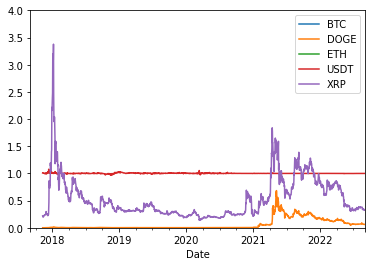

In [97]:
bothtest.groupby("Coin Name")["Close"].plot()
plt.legend()
plt.ylim(top=4,bottom=0)

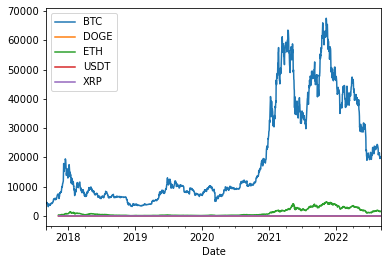

In [98]:
bothtest.groupby("Coin Name")["Close"].plot()
plt.legend()
# plt.ylim(top=4,bottom=0)

In [99]:
bothtest["Year"] = bothtest.index.map(lambda x: x.year)
bothtest["Month"] = bothtest.index.map(lambda x: x.month)
bothtest

,Open,High,Low,Close,Coin Name,Year,Month
Date,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,DOGE,2017,11
2017-11-10,0.001421,0.001431,0.001125,0.001163,DOGE,2017,11
2017-11-11,0.001146,0.001257,0.001141,0.001201,DOGE,2017,11
2017-11-12,0.001189,0.001210,0.001002,0.001038,DOGE,2017,11
2017-11-13,0.001046,0.001212,0.001019,0.001211,DOGE,2017,11
...,...,...,...,...,...,...,...
2022-08-29,1430.439453,1556.309570,1427.728394,1553.037354,ETH,2022,8
2022-08-30,1553.188965,1600.461182,1480.831787,1523.838867,ETH,2022,8
2022-08-31,1524.286499,1612.358887,1524.286499,1553.684937,ETH,2022,8


In [100]:
pd.get_dummies(bothtest)

,Open,High,Low,Close,Year,Month,Coin Name_BTC,Coin Name_DOGE,Coin Name_ETH,Coin Name_USDT,Coin Name_XRP
Date,,,,,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,2017,11,0,1,0,0,0
2017-11-10,0.001421,0.001431,0.001125,0.001163,2017,11,0,1,0,0,0
2017-11-11,0.001146,0.001257,0.001141,0.001201,2017,11,0,1,0,0,0
2017-11-12,0.001189,0.001210,0.001002,0.001038,2017,11,0,1,0,0,0
2017-11-13,0.001046,0.001212,0.001019,0.001211,2017,11,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29,1430.439453,1556.309570,1427.728394,1553.037354,2022,8,0,0,1,0,0
2022-08-30,1553.188965,1600.461182,1480.831787,1523.838867,2022,8,0,0,1,0,0
2022-08-31,1524.286499,1612.358887,1524.286499,1553.684937,2022,8,0,0,1,0,0


In [101]:
bothtest.to_csv("Resources/Cryptocurrencies.csv")